In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [23]:
%matplotlib notebook
class Const:
    def __init__(self): # needs the self, remember that you can even do a default value ex, n=animal='8'
        self.n_animals = 100
        self.n_steps = 200
        self.vmin = 0.01
        self.vmax = 0.05
        self.trap_size = 0.4 
        self.trap_location = 'corner'
        self.death_rate = 0.001

In [24]:
def model(c, show_dots=False, n_trials = 1):    #can be any letter
    history = np.zeros((c.n_steps,n_trials))
    
    for i_trial in range(n_trials):
        x = np.random.uniform(size=c.n_animals)
        y = np.random.uniform(size=c.n_animals)
        vx = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals, low=c.vmin, high=c.vmax)*(2*np.random.randint(size=c.n_animals,low=0,high=2) - 1)
        
        # Capture
        if c.trap_location =='corner':
            color = np.where(np.logical_and(x<c.trap_size , y<c.trap_size), 1, 0) 
        else:
            color=np.where((x<0.5+c.trap_size/2)*(x>0.5-c.trap_size/2)*(y<0.5+c.trap_size/2)*(y>0.5-c.trap_size/2), 1,0)
            n_marked = np.sum(color)

        estimation = np.zeros(c.n_steps) 

        if show_dots:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            is_replaced = np.random.uniform(size=c.n_animals)<death.rate
             color[is_replace] = 0
            
            if c.trap_location =='corner':
                is_inside =np.logical_and(x<c.trap_size, y<c.trap_size)
                n_recaptured_total = np.sum(is_inside)
                n_recaptured_marked = np.sum(is_inside)*color 
                
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 

            if show_dots:
                ax.clear()
                plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
                plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
                plt.xlim((0,1));
                plt.ylim((0,1));
                c.fig.canvas.draw()
                time.sleep(0.005)

        history[:,i_trial] = estimation
    return np.mean(history, axis=1)  # does it always need a return? 


SyntaxError: invalid syntax (<ipython-input-24-c8ba1cff64c9>, line 13)

<IPython.core.display.Javascript object>


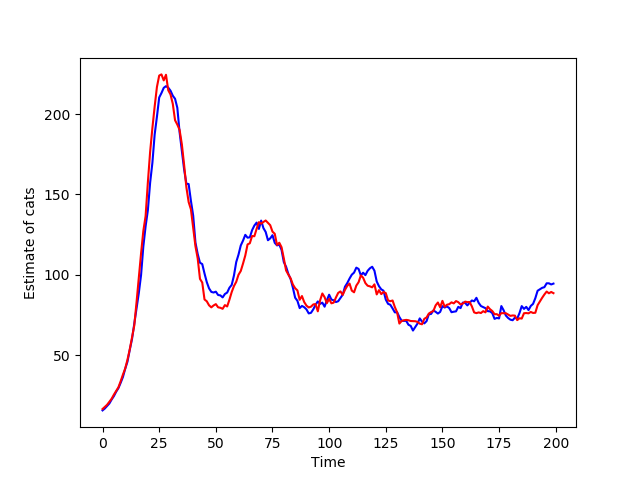

In [25]:
c = Const()
curve1 = model(c, n_trials=100)
c.trap_location = 'inside'
curve2 = model(c, n_trials=100)

plt.figure()
plt.plot(curve1, '-b')
plt.plot(curve2, '-r')
plt.xlabel('Time');
plt.ylabel('Estimate of cats');